In [5]:
from models.FF_1H import *
import torch
from main import *
from torch.utils.data import DataLoader
torch.manual_seed(0)

In [6]:
simple_FF = SimpleNN(2048, 1, 8, nn.ReLU)
weights = torch.load('weights/FFNN/1NN_Weight.pt')
simple_FF.load_state_dict(weights)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
simple_FF.to(device)

SimpleNN(
  (regressor): Sequential(
    (0): Linear(in_features=2048, out_features=8, bias=True)
    (1): ReLU()
    (2): Dropout(p=0, inplace=False)
    (3): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [25]:
def gradient_wrt_input(model, inp, lr, iters):
    for i in range(iters):
        if inp.grad is not None:
            inp.grad.zero_()
        output = model(inp)
        output.backward()

        with torch.no_grad():
            inp -= lr * inp.grad * (inp != 0).float()
        inp.grad.zero_()
    return inp


In [27]:
import matplotlib.pyplot as plt
def show_arrays(inp):
    data = inp.cpu().detach().numpy()
    reshaped_data = np.reshape(data, (2,1024))
    x = reshaped_data[0]
    y = reshaped_data[1]

    nonzero_ind = np.nonzero((x != 0) | (y != 0))
    x = x[nonzero_ind]
    y = y[nonzero_ind]

    plt.scatter(x,y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Coordinates')
    plt.show()

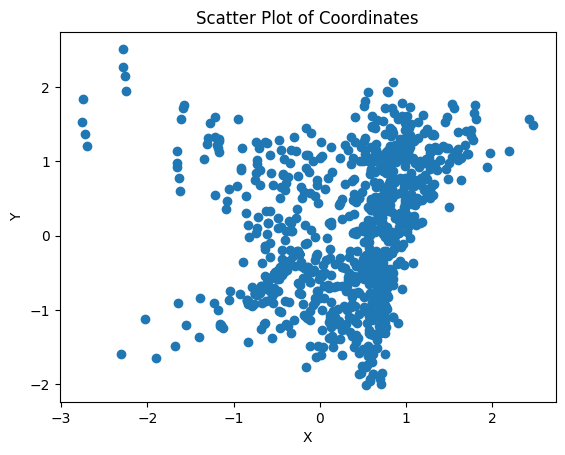

# of Antennas: 888
Pred: tensor([[-0.2147]], device='cuda:0', grad_fn=<AddmmBackward0>)
Real: tensor([-0.1296], device='cuda:0')


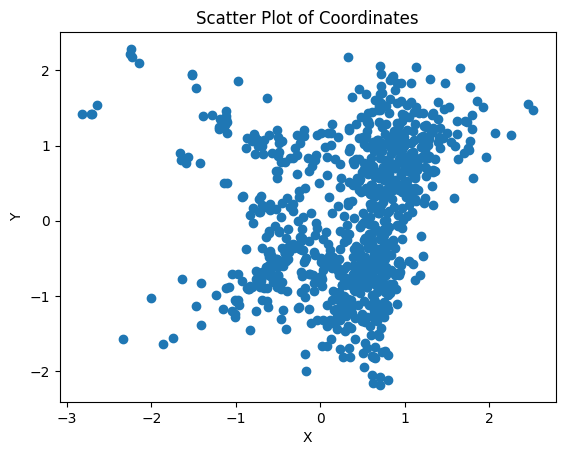

New Pred: tensor([[-4.1830]], device='cuda:0', grad_fn=<AddmmBackward0>)
# of Antennas: 888


In [29]:
train_loader = DataLoader(AntDataset('data/large/scaled/YZ_Large_S_70.npz'))
for inp, out in train_loader:
    inp, out = inp.to(device), out.to(device)
    show_arrays(inp)
    inp.requires_grad_()
    pred = simple_FF(inp)
    print(f'# of Antennas: {torch.count_nonzero(inp).item()//2}')
    print(f'Pred: {pred}')
    print(f'Real: {out}')
    optimized_inp = gradient_wrt_input(simple_FF, inp, 1e-3, 10000)
    new_pred = simple_FF(optimized_inp)
    show_arrays(optimized_inp)
    print(f'New Pred: {new_pred}')
    print(f'# of Antennas: {torch.count_nonzero(inp).item()//2}')
    break

tensor([[-30.9829, -30.3919, -29.8009,  ...,   0.0000,   0.0000,   0.0000]])
tensor([-12131.3057])


In [4]:
data = np.load('data/large/large_YZant.npz')['arr_0']

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
        0.        , -0.93040047])